In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [8]:
df_duplicado = df.drop(columns=['reading score', 'writing score']).copy()

In [9]:
print(df_duplicado.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  
0                    none          72  
1               completed          69  
2                    none          90  
3                    none          47  
4                    none          76  


In [10]:
df_duplicado.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
dtype: int64

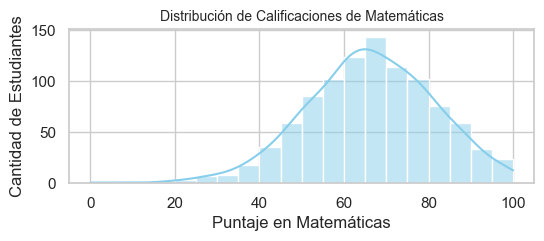

In [11]:
sns.set(style="whitegrid")
# Crear el histograma
plt.figure(figsize=(6, 2))
sns.histplot(data=df, x="math score", bins=20, kde=True, color="skyblue")

# Títulos
plt.title("Distribución de Calificaciones de Matemáticas", fontsize=10)
plt.xlabel("Puntaje en Matemáticas")
plt.ylabel("Cantidad de Estudiantes")

# Mostrar el gráfico
plt.show()

In [12]:
df_duplicado.describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\4097551446.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="math score", data=df, palette="pastel", ax=axes[0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\4097551446.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="pastel", ax=axes[1])


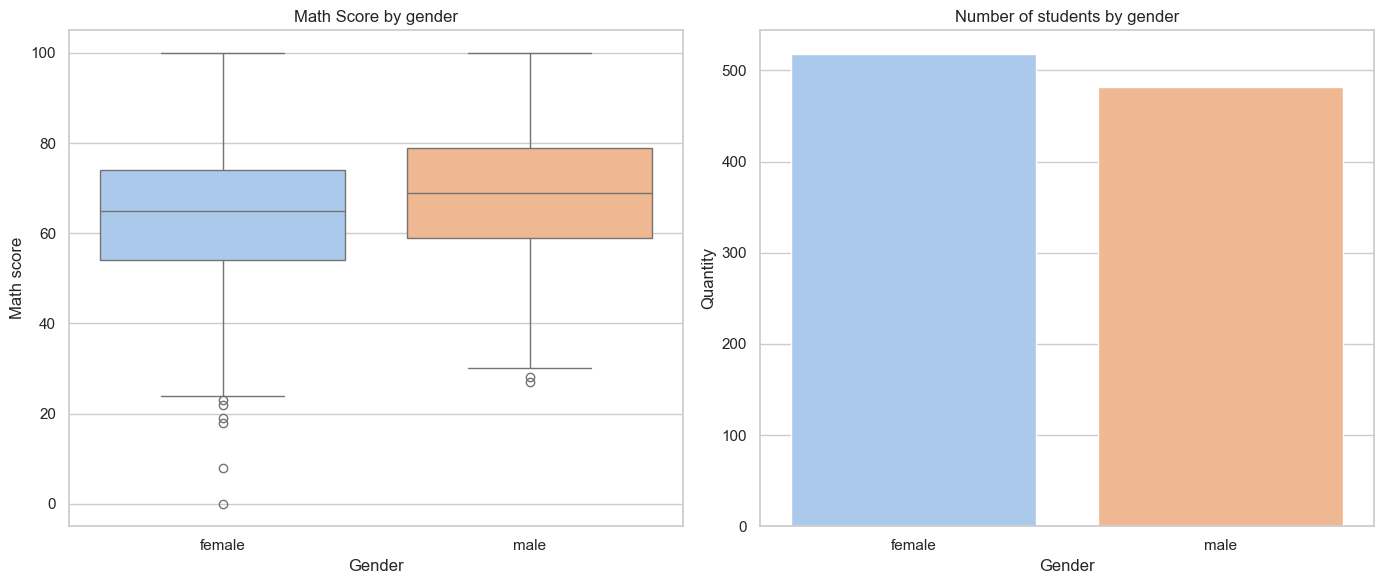

In [13]:
sns.set(style="whitegrid")

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico 1: Boxplot de math score por género ---
sns.boxplot(x="gender", y="math score", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Math Score by gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Math score")

# --- Gráfico 2: Conteo de hombres y mujeres ---
sns.countplot(x="gender", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("Number of students by gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Quantity")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

Podemos evidenciar  que la diferencia entre la cantidad de hombres y mujeres es minima, por ende la diferencia entre sus notas de matematicas es igual de minima, tambien podemos evidenciar que hay irregularidades en las notas de las mujeres ya que observamos que hay varias notas por debajo de 25 mientras que las notas de los hombres estan por debajo de 30.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\2439656154.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="lunch", y="math score", data=df, palette="pastel", ax=axes[0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\2439656154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="lunch", data=df, palette="pastel", ax=axes[1])


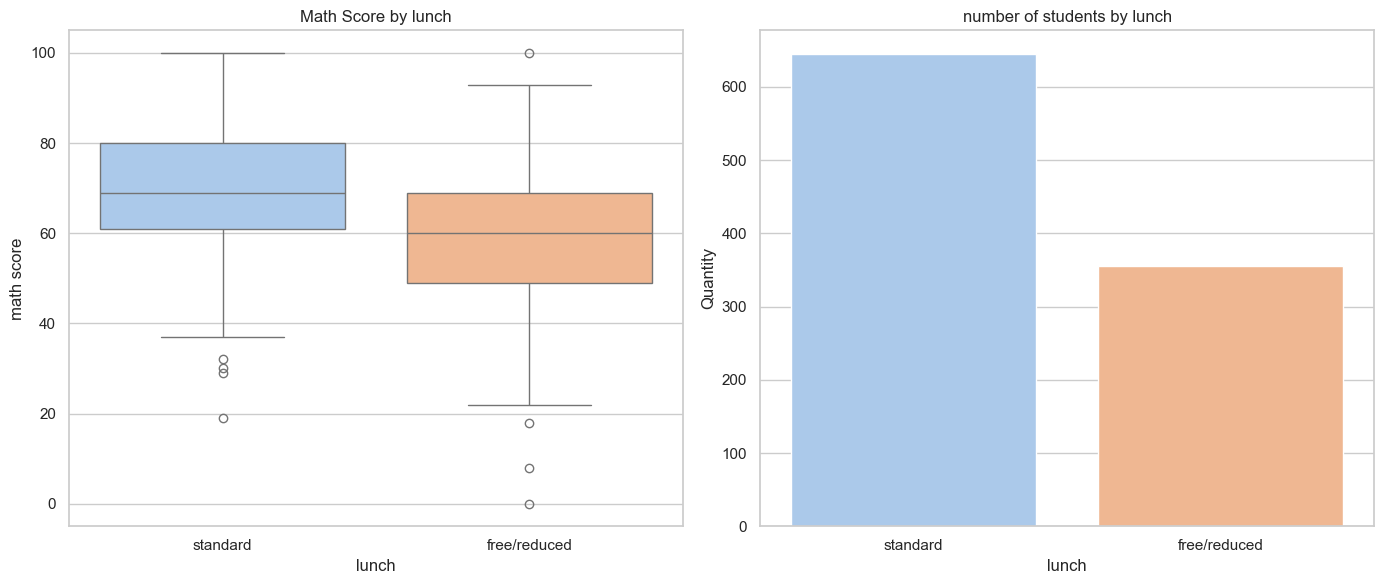

In [14]:
sns.set(style="whitegrid")

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico 1: Boxplot de math score por género ---
sns.boxplot(x="lunch", y="math score", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Math Score by lunch")
axes[0].set_xlabel("lunch")
axes[0].set_ylabel("math score")

# --- Gráfico 2: Conteo de hombres y mujeres ---
sns.countplot(x="lunch", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("number of students by lunch")
axes[1].set_xlabel("lunch")
axes[1].set_ylabel("Quantity")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\245249336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="race/ethnicity", y="math score", data=df, palette="pastel", ax=axes[0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\245249336.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="race/ethnicity", data=df, palette="pastel", ax=axes[1])


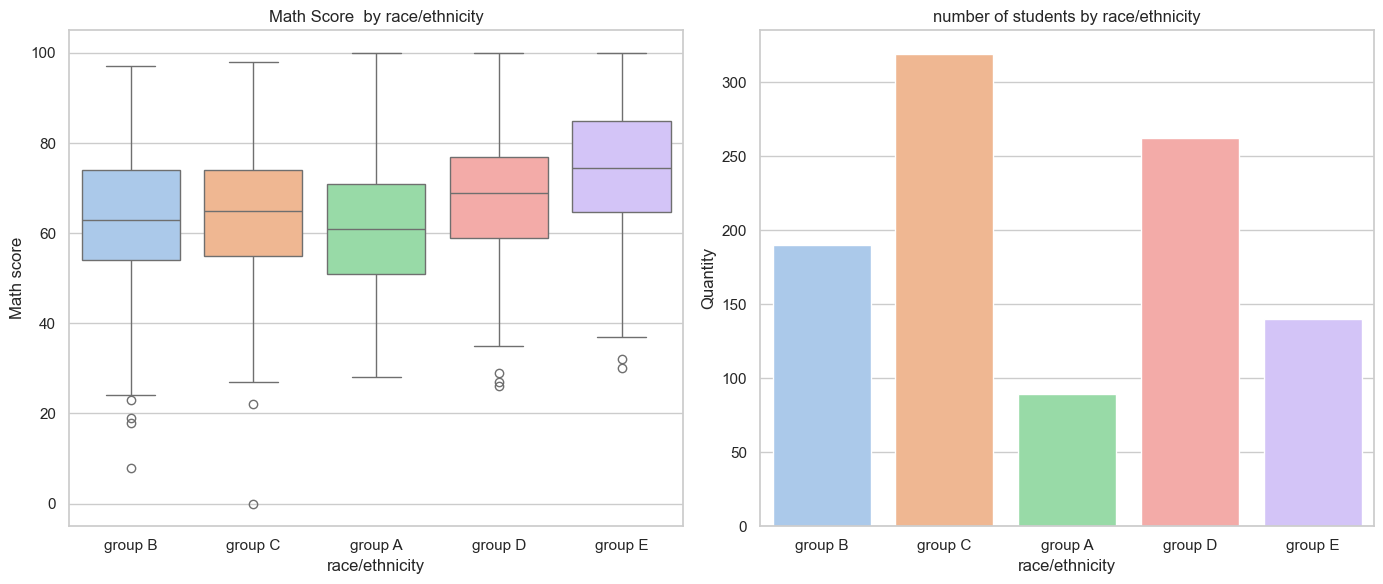

In [15]:
sns.set(style="whitegrid")

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico 1: Boxplot de math score por género ---
sns.boxplot(x="race/ethnicity", y="math score", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Math Score  by race/ethnicity")
axes[0].set_xlabel("race/ethnicity")
axes[0].set_ylabel("Math score")

# --- Gráfico 2: Conteo de hombres y mujeres ---
sns.countplot(x="race/ethnicity", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("number of students by race/ethnicity")
axes[1].set_xlabel("race/ethnicity")
axes[1].set_ylabel("Quantity")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\3445171101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="parental level of education", y="math score", data=df, palette="pastel", ax=axes[0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\3445171101.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="parental level of education", data=df, palette="pastel", ax=axes[1])


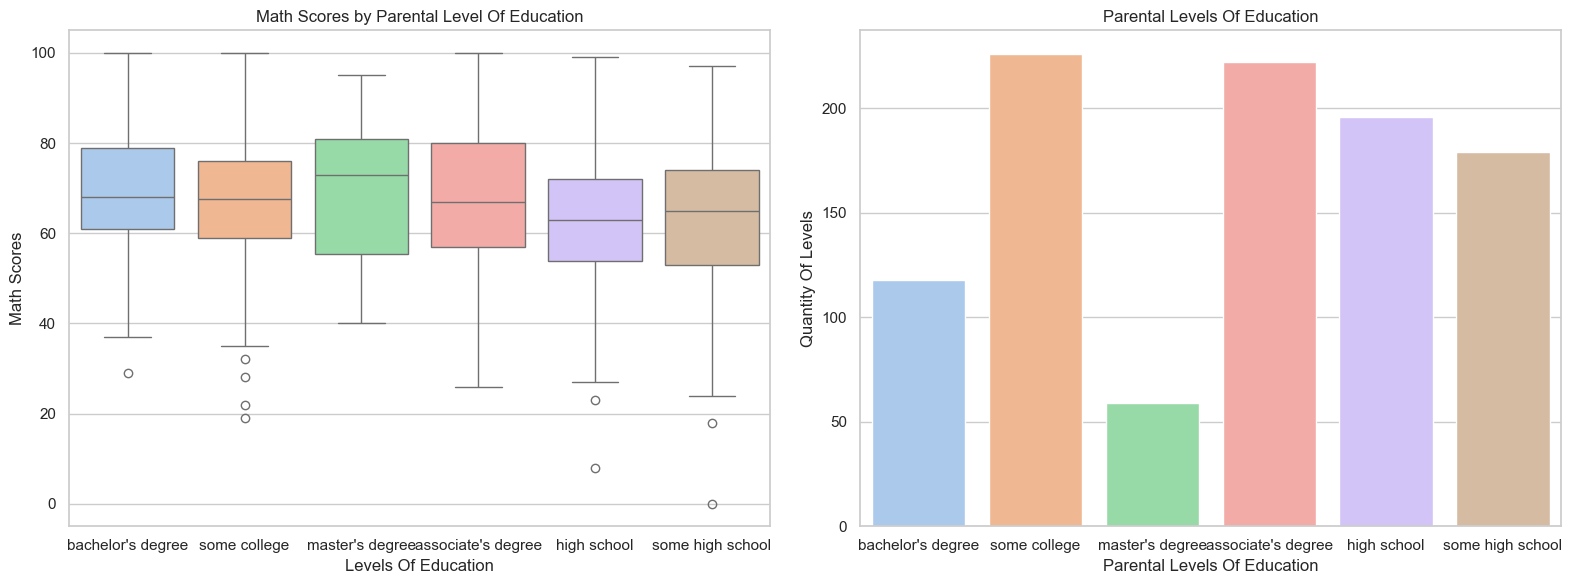

In [16]:
sns.set(style="whitegrid")

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico 1: Boxplot de math score por género ---
sns.boxplot(x="parental level of education", y="math score", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Math Scores by Parental Level Of Education")
axes[0].set_xlabel("Levels Of Education")
axes[0].set_ylabel("Math Scores")

# --- Gráfico 2: Conteo de hombres y mujeres ---
sns.countplot(x="parental level of education", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("Parental Levels Of Education")
axes[1].set_xlabel("Parental Levels Of Education")
axes[1].set_ylabel("Quantity Of Levels")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\3676961655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="test preparation course", y="math score", data=df, palette="pastel", ax=axes[0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\3676961655.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="test preparation course", data=df, palette="pastel", ax=axes[1])


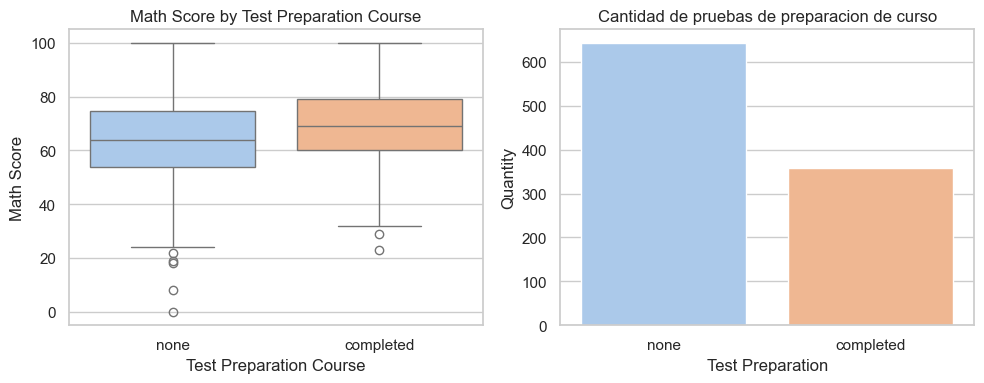

In [17]:
sns.set(style="whitegrid")

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Gráfico 1: Boxplot de math score por género ---
sns.boxplot(x="test preparation course", y="math score", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Math Score by Test Preparation Course")
axes[0].set_xlabel("Test Preparation Course")
axes[0].set_ylabel("Math Score")

# --- Gráfico 2: Conteo de hombres y mujeres ---
sns.countplot(x="test preparation course", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("Cantidad de pruebas de preparacion de curso")
axes[1].set_xlabel("Test Preparation")
axes[1].set_ylabel("Quantity")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

In [18]:
df_encoded = pd.get_dummies(df_duplicado, columns=["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"])
df_encoded = df_encoded.astype(int)
df_encoded.head()

,math score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [19]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)